<a href="https://colab.research.google.com/github/stephaneNiyonizigiye/ML-AI_models/blob/main/yolov_real_time_detection_final_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this model is implement for chess piece recognition and image classifier

Created and optmised for a computer vision on a physical chess board where a robotic arm will be used to make movements

author: stephane Niyonizigiye

# Imports

In [ ]:
!pip install keras-tuner

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import GridSearchCV
import keras_tuner as kt

# pré-traitement des données

In [ ]:
!kaggle datasets download krithiik/chess-pieces

Dataset URL: https://www.kaggle.com/datasets/krithiik/chess-pieces
License(s): Community Data License Agreement - Permissive - Version 1.0
 87% 34.0M/39.2M [00:00<00:00, 125MB/s] 
100% 39.2M/39.2M [00:00<00:00, 114MB/s]


unzipping the dataset

In [ ]:
!unzip chess-pieces.zip -d chess-pieces

standarisation des données

In [ ]:
# Répertoire du dataset
dataset_directory = "/content/chess-pieces/all_resized_into_sub_folders_640"

# Préparation du générateur d'images avec des transformations pour augmenter les données d'entraînement
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
    )

# Chargement des données d'entraînement
train_data = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Chargement des données de validation
validation_data = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 240 images belonging to 12 classes.
Found 60 images belonging to 12 classes.


# Entrennement

In [ ]:


# Fonction pour construire le modèle avec des hyperparamètres variables
def build_model(hp):
    model = Sequential()

    # 1ère couche de convolution + max pooling
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),  # Nombre de filtres variable
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(64, 64, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2ème couche de convolution + max pooling
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),  # Nombre de filtres variable
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Couche de Flatten et Dense
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),  # Nombre de neurones variable
        activation='relu'
    ))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(train_data.num_classes, activation='softmax'))

    # Compilation du modèle
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialisation de l'objet de recherche d'hyperparamètres
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # Nombre d'architectures à tester
    executions_per_trial=3,  # Nombre de fois que chaque modèle est exécuté
    directory='my_dir',
    project_name='cnn_tuning'
)

# Recherche des meilleurs hyperparamètres
tuner.search(train_data, epochs=10, validation_data=validation_data)

# Récupération des meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Meilleurs hyperparamètres : {best_hps.values}")



Trial 18 Complete [00h 04m 10s]
val_accuracy: 0.21111111839612326

Best val_accuracy So Far: 0.3055555621782939
Total elapsed time: 01h 25m 43s

Search: Running Trial #19

Value             |Best Value So Far |Hyperparameter
96                |32                |conv_1_filters
256               |256               |conv_2_filters
64                |256               |dense_units

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 982ms/step - accuracy: 0.0693 - loss: 2.8041 - val_accuracy: 0.0500 - val_loss: 2.4854
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0688 - loss: 2.4868 - val_accuracy: 0.0833 - val_loss: 2.4848
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0855 - loss: 2.4850 - val_accuracy: 0.0833 - val_loss: 2.4849
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 950ms/step - accuracy: 0.0700 - loss: 2.4849 - val_accuracy: 0.0833 - val_loss: 2.4845
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 953ms/step - accuracy: 0.0922 - loss: 2.4852 - val_accuracy: 0.0833 - val_los

construction du model CNN

In [ ]:
# Construction du modèle
model = Sequential()

# 1ère couche de convolution + max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2ème couche de convolution + max pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3ème couche de convolution + max pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Couchage du réseau (Flatten) et ajout des couches denses
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(train_data.num_classes, activation='softmax'))  # 'num_classes' correspond au nombre de classes

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


entrainnement du model

In [ ]:
# Entraînement du modèle
history = model.fit(
    train_data,
    epochs=12,  # Tu peux ajuster le nombre d'époques
    validation_data=validation_data
)


Epoch 1/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - accuracy: 0.0931 - loss: 2.5045 - val_accuracy: 0.0833 - val_loss: 2.4833
Epoch 2/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.1136 - loss: 2.4753 - val_accuracy: 0.0500 - val_loss: 2.4822
Epoch 3/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.0873 - loss: 2.4859 - val_accuracy: 0.0833 - val_loss: 2.4800
Epoch 4/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 402ms/step - accuracy: 0.0904 - loss: 2.4842 - val_accuracy: 0.1500 - val_loss: 2.4765
Epoch 5/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.1164 - loss: 2.4736 - val_accuracy: 0.1000 - val_loss: 2.4608
Epoch 6/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.0872 - loss: 2.4540 - val_accuracy: 0.1000 - val_loss: 2.4099
Epoch 7/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.1382 - loss: 2.4131 - val_accuracy: 0.2333 - val_loss: 2.3144
Epoch 8/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.1530 - loss: 2.3260 - val_accuracy: 0.1500 - val_loss:

evaluation du model

In [ ]:
# Évaluation sur les données de validation
val_loss, val_acc = model.evaluate(validation_data)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")





2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.3153 - loss: 1.9359
Validation Loss: 1.9649256467819214, Validation Accuracy: 0.3166666626930237


sauvegarde du model

In [ ]:
# Sauvegarder le modèle
model.save('chess_piece_classifier_model.h5')


# Picture taking

In [ ]:
# Utiliser JavaScript pour accéder à la caméra dans Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import PIL
from io import BytesIO

# Fonction pour prendre une photo depuis la webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to a 640x480 image.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for the capture button to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = 640;
      canvas.height = 480;
      canvas.getContext('2d').drawImage(video, 0, 0, canvas.width, canvas.height);
      stream.getTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Prendre une photo
filename = take_photo()
print(f"Photo saved as {filename}")


<IPython.core.display.Javascript object>

Photo saved as photo.jpg


image treatment


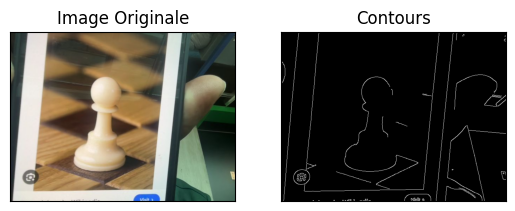

In [ ]:
# Charger l'image capturée avec OpenCV
img = cv2.imread(filename)

# Convertir en niveaux de gris pour traitement
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer un filtre de contours, par exemple
edges = cv2.Canny(gray, 100, 200)

# Afficher l'image originale et celle avec les contours
from matplotlib import pyplot as plt

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Contours'), plt.xticks([]), plt.yticks([])

plt.show()


# Test

charger et traiter l'image

In [ ]:
# Charger l'image de test (modifie le chemin vers l'image que tu veux tester)
img_path = '/content/photo.jpg'

# Charger l'image avec la même taille utilisée pendant l'entraînement
img = image.load_img(img_path, target_size=(64, 64))

# Convertir l'image en tableau numpy
img_array = image.img_to_array(img)

# Ajouter une dimension pour correspondre au format attendu par le modèle (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normaliser l'image (si tu as normalisé les images d'entraînement)
img_array = img_array / 255.0


predire avec le model

In [ ]:
# Faire la prédiction
prediction = model.predict(img_array)

# Afficher les prédictions
print("Prédiction brute : ", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Prédiction brute :  [[1.1371482e-01 2.6676795e-01 1.3218065e-05 2.7018398e-01 3.4932005e-01]]


interpretation de la prédiction

In [ ]:
# Trouver l'index de la classe prédite
predicted_class_index = np.argmax(prediction)

# Afficher la classe prédite
class_names = list(train_data.class_indices.keys())  # Obtenir les noms des classes
print(f"L'image est prédite comme étant : {class_names[predicted_class_index]}")


L'image est prédite comme étant : pawn_resized


visualisation de la prédiction

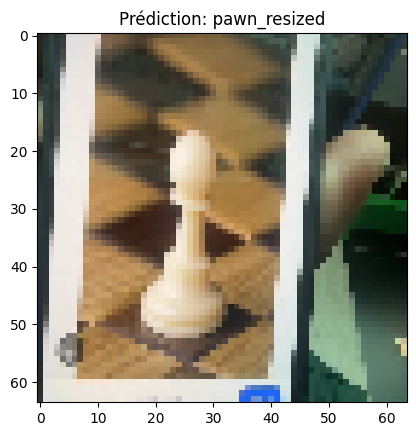

In [ ]:
import matplotlib.pyplot as plt

# Afficher l'image
plt.imshow(image.load_img(img_path, target_size=(64, 64)))
plt.title(f"Prédiction: {class_names[predicted_class_index]}")
plt.show()


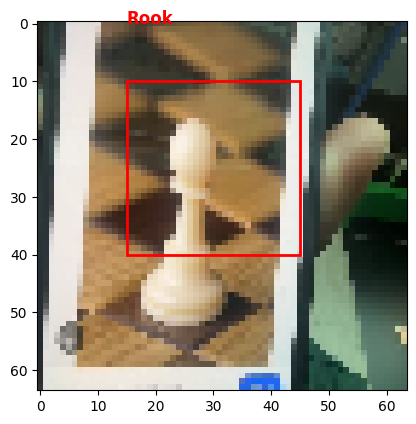

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Charger l'image
img_path = '/content/photo.jpg'
img = image.load_img(img_path, target_size=(64, 64))

# Convertir en tableau numpy pour affichage
img_array = image.img_to_array(img) / 255.0

# Définir les coordonnées du carré (ici un exemple fictif)
x, y, width, height = 15, 10, 30, 30  # À modifier avec tes coordonnées

# Créer une figure et un axe
fig, ax = plt.subplots()

# Afficher l'image
ax.imshow(img_array)

# Ajouter un carré autour de la pièce prédite
rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Ajouter le nom de la pièce prédite
predicted_class = "Rook"  # Remplace par le nom prédit
plt.text(x, y - 10, predicted_class, color='red', fontsize=12, fontweight='bold')

# Afficher l'image
plt.show()


In [ ]:
# Sauvegarder le modèle
model.save('chess_piece_classifier_model.h5')


NameError: name 'model' is not defined

In [ ]:
import cv2
import numpy as np


# Charger ton modèle entraîné
model = tf.keras.models.load_model('chess_piece_classifier_model.h5')

# Charger les noms des classes (associées aux indices de classe)
class_names = ["Queen", "Rook", "Bishop", "Knight", "Pawn"]  # Adapte cette liste à ton modèle

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erreur : Impossible d'ouvrir la caméra.")
    exit()

while True:
    # Lire une frame de la vidéo
    ret, frame = cap.read()

    if not ret:
        break

    # Prétraiter l'image (comme pendant l'entraînement)
    img_resized = cv2.resize(frame, (64, 64))  # Redimensionner à 64x64
    img_array = image.img_to_array(img_resized) / 255.0  # Normaliser
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour batch

    # Faire la prédiction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Afficher la prédiction sur la vidéo
    cv2.putText(frame, f"Predicted: {predicted_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Optionnel : Dessiner un rectangle autour d'une région spécifique (ajuste les coordonnées)
    # cv2.rectangle(frame, (50, 50), (200, 200), (255, 0, 0), 2)

    # Afficher la vidéo en temps réel
    cv2.imshow('Chess Piece Detection', frame)

    # Quitter si la touche 'q' est pressée
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la caméra et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


Erreur : Impossible d'ouvrir la caméra.


In [ ]:
# Importer les bibliothèques nécessaires
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Charger ton modèle de classification
model = tf.keras.models.load_model('chess_piece_classifier_model.h5')

# Charger les noms des classes
class_names = ["Queen", "Rook", "Bishop", "Knight", "Pawn"]  # Adapte cette liste à ton modèle

# Fonction pour prendre une photo depuis la webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to a 640x480 image.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for the capture button to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = 640;
      canvas.height = 480;
      canvas.getContext('2d').drawImage(video, 0, 0, canvas.width, canvas.height);
      stream.getTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Prendre une photo
filename = take_photo()
print(f"Photo saved as {filename}")

# Charger et traiter l'image pour la prédiction
img = cv2.imread(filename)
img_resized = cv2.resize(img, (64, 64))  # Redimensionner
img_array = image.img_to_array(img_resized) / 255.0  # Normaliser
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch

# Faire la prédiction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

# Afficher la prédiction
print(f"La pièce prédite est : {predicted_class}")


<IPython.core.display.Javascript object>

Photo saved as photo.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
La pièce prédite est : Knight
